# 6 Visualise laballed data and remove artefacts

Code that let us overlay each frame of video with outputs from the models. And create time series plots. 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import utils
import display

In [2]:
videos_in = r"..\LookitLaughter.test"
metadata_file = "_LookitLaughter.xlsx"
data_out = r"..\data\1_interim"

#a couple of files for testing
VIDEO_FILE  = os.path.join(videos_in, "2UWdXP.joke1.rep2.take1.Peekaboo.mp4")
VIDEO_FILE2 = os.path.join(videos_in, "2UWdXP.joke2.rep1.take1.NomNomNom.mp4")

testset = [VIDEO_FILE, VIDEO_FILE2] 

In [3]:
processedvideos = utils.getprocessedvideos(data_out)
processedvideos.head()

Found existing processedvideos.xlsx


,VideoID,ChildID,JokeType,JokeNum,JokeRep,JokeTake,HowFunny,LaughYesNo,Frames,FPS,...,Audio.file,Faces.when,Faces.file,LastError,Speech.file,Speech.when,Objects.file,Objects.when,Understand.file,Understand.when
0,2UWdXP.joke1.rep2.take1.Peekaboo.mp4,2UWdXP,Peekaboo,1,2,1,Slightly funny,No,217,14.298910,...,..\data\1_interim\\2UWdXP.joke1.rep2.take1.Pee...,2023-10-03 13:10:37,..\data\1_interim\2UWdXP.joke1.rep2.take1.Peek...,NaN,..\data\1_interim\2UWdXP.joke1.rep2.take1.Peek...,2023-09-20 16:58:38,NaN,NaN,NaN,NaN
1,2UWdXP.joke1.rep3.take1.Peekaboo.mp4,2UWdXP,Peekaboo,1,3,1,Slightly funny,No,152,14.359089,...,..\data\1_interim\\2UWdXP.joke1.rep3.take1.Pee...,2023-10-03 13:12:51,..\data\1_interim\2UWdXP.joke1.rep3.take1.Peek...,NaN,..\data\1_interim\2UWdXP.joke1.rep3.take1.Peek...,2023-09-20 16:58:39,NaN,NaN,NaN,NaN
2,2UWdXP.joke2.rep1.take1.NomNomNom.mp4,2UWdXP,NomNomNom,2,1,1,Funny,No,95,13.241315,...,..\data\1_interim\\2UWdXP.joke2.rep1.take1.Nom...,2023-10-03 13:14:15,..\data\1_interim\2UWdXP.joke2.rep1.take1.NomN...,NaN,..\data\1_interim\2UWdXP.joke2.rep1.take1.NomN...,2023-09-20 16:58:40,NaN,NaN,NaN,NaN
3,2UWdXP.joke2.rep2.take1.NomNomNom.mp4,2UWdXP,NomNomNom,2,2,1,Slightly funny,No,97,14.213813,...,..\data\1_interim\\2UWdXP.joke2.rep2.take1.Nom...,2023-10-03 13:15:18,..\data\1_interim\2UWdXP.joke2.rep2.take1.NomN...,NaN,..\data\1_interim\2UWdXP.joke2.rep2.take1.NomN...,2023-09-20 16:58:40,NaN,NaN,NaN,NaN
4,2UWdXP.joke2.rep3.take1.NomNomNom.mp4,2UWdXP,NomNomNom,2,3,1,Slightly funny,No,133,14.223092,...,..\data\1_interim\\2UWdXP.joke2.rep3.take1.Nom...,2023-10-03 13:17:30,..\data\1_interim\2UWdXP.joke2.rep3.take1.NomN...,NaN,..\data\1_interim\2UWdXP.joke2.rep3.take1.NomN...,2023-09-20 16:58:48,NaN,NaN,NaN,NaN


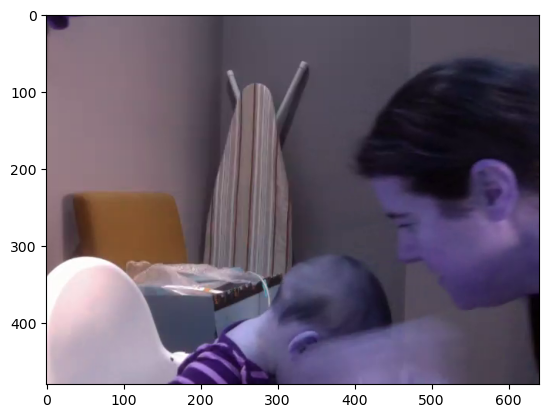

We have a keypoints file for this video


In [4]:
#let's grab a single frame from the video

framenum = 4
video = cv2.VideoCapture(VIDEO_FILE)
video.set(cv2.CAP_PROP_POS_FRAMES, framenum)
ret, frame = video.read()

if ret:
    plt.imshow(frame)
    plt.show()

#look in processed videos to see if we have a keypoints file for this video
videoname = os.path.basename(VIDEO_FILE)
videodata = processedvideos[processedvideos['VideoID'] == videoname]
if videodata.shape[0] > 0:
    print("We have a keypoints file for this video")
    kptsfile = videodata['Keypoints.file'].values[0]
    #Load the keypoints file
    kpts = pd.read_csv(kptsfile)
    kpts.head()

video.release()

In [5]:
print(f"kptsfile: {kptsfile}")

kpts.iloc[3]

kptsfile: ..\data\1_interim\2UWdXP.joke1.rep2.take1.Peekaboo.csv


Unnamed: 0                   3
frame                        3
person                   child
index                        0
bboxcent.x            517.6922
bboxcent.y          268.861542
bbox.width          244.291595
bbox.height         422.276947
bbox.c                0.519463
nose.x              451.206238
nose.y              312.775391
nose.c                0.950903
left_eye.x          467.204437
left_eye.y          267.338623
left_eye.c            0.988065
right_eye.x         454.171204
right_eye.y         275.966919
right_eye.c            0.23554
left_ear.x          572.157776
left_ear.y          238.928513
left_ear.c            0.967395
right_ear.x         519.890564
right_ear.y         258.796753
right_ear.c           0.002977
left_shoulder.x     583.715942
left_shoulder.y     429.665161
left_shoulder.c       0.451757
right_shoulder.x    599.972229
right_shoulder.y    384.976929
right_shoulder.c      0.284799
left_elbow.x        433.458069
left_elbow.y             480.0
left_elb

In [8]:
framekpts = kpts[kpts['frame'] == 3]

bboxes = framekpts.iloc[:,2:8].values
print(bboxes)

xycs = framekpts.iloc[:,9:].values

print(xycs)

[['child' 0 517.6921997070312 268.8615417480469 244.2915954589844 422.2769470214844]]
[[     451.21      312.78      0.9509       467.2      267.34     0.98807      454.17      275.97     0.23554      572.16      238.93      0.9674      519.89       258.8   0.0029772      583.72      429.67     0.45176      599.97      384.98      0.2848      433.46         480    0.029976      497.98      403.49
     0.021228      466.16      420.83     0.13011      449.01      421.17    0.098306      566.99         480   0.0020262         594      478.11   0.0027338      482.82      473.45   0.0029867      540.93      431.98   0.0039066      500.93      427.21   0.0029871      483.23      387.56   0.0041373]]


In [9]:
frame = display.drawOneFrame(frame, bboxes, xycs)


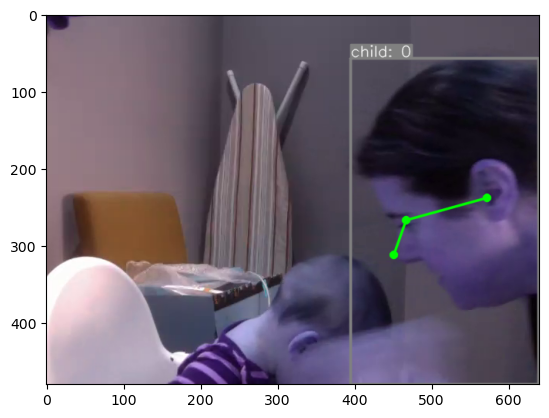

In [10]:
plt.imshow(frame)
plt.show()